In [3]:
# Initialize plot objects
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
import numpy as np
import pandas as pd

from numpy import ma

df = pd.read_csv('pion2ad.csv')

In [5]:
df.head(100)

,Unnamed: 0,epsilon,mass,n_expected
0,0,1.000000e-07,0.010000,0.000043
1,1,5.263253e-03,0.010000,0.000000
2,2,1.052641e-02,0.010000,0.000000
3,3,1.578956e-02,0.010000,0.000000
4,4,2.105271e-02,0.010000,0.000000
...,...,...,...,...
95,95,7.894739e-02,0.028947,0.000000
96,96,8.421054e-02,0.028947,0.000000
97,97,8.947369e-02,0.028947,0.000000
98,98,9.473685e-02,0.028947,0.000000


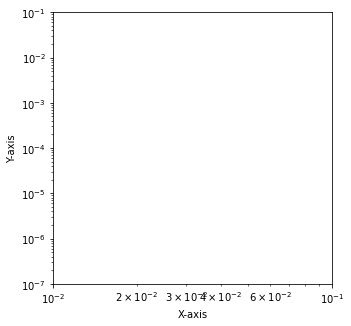

In [7]:

Z = df.pivot_table(index='epsilon', columns='mass', values='n_expected').T.values

X_unique = np.sort(df.mass.unique())
Y_unique = np.sort(df.epsilon.unique())
X, Y = np.meshgrid(X_unique, Y_unique)
Z = ma.masked_where(Z <= 0, Z)

mpl.rcParams['figure.figsize'] = 5, 5 # sets plot size
fig = plt.figure()
ax = fig.add_subplot(111)

# Define levels in z-axis where we want lines to appear
#levels = np.array([3000, 50000, 120000, 200000, 250000])
#levels_exp = np.arange(np.floor(np.log10(Z.min())-1), np.ceil(np.log10(Z.max())+1))
#levels = np.power(10, levels_exp)

# Generate a color mapping of the levels we've specified
import matplotlib.cm as cm # matplotlib's color map library
cpf = ax.contourf(X,Y,Z, len(levels), cmap=cm.Reds)

# Set all level lines to black
line_colors = ['blue' for l in cpf.levels]

# Make plot and customize axes
cp = ax.contour(X, Y, Z, levels=5)
ax.clabel(cp, fontsize=10)
plt.xticks([0,0.5,1])
plt.yticks([0,0.5,1])
ax.set_xlabel('X-axis')
plt.xscale("log")
plt.yscale("log")
_ = ax.set_ylabel('Y-axis')

#plt.savefig('figure.pdf') # uncomment to save vector/high-res version

In [8]:
pd.plotting.boxplot_frame_groupby(df)

ValueError: too many values to unpack (expected 2)

Error in callback <function flush_figures at 0x7f09052eaa60> (for post_execute):


KeyboardInterrupt: 